In [1]:
# required Python imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace

import ftir_funct as f
np.set_printoptions(suppress=True)

module FTIR v.2024.3.19 imported


## Generate database

### Silicate overtone region

In [2]:
url = 'https://raw.githubusercontent.com/bertopadron/FTIR-EBSD/main/data/GRR997synthinput.csv'
Si_region = pd.read_csv(url, delimiter=',', names=['lambda', 'Aa', 'Ab', 'Ac'])

# set negative absorbance (A) values to zero
Si_region[Si_region < 0] = 0

# Estimate transmittance
Si_region['Ta'] = 10 ** -Si_region['Aa']
Si_region['Tb'] = 10 ** -Si_region['Ab']
Si_region['Tc'] = 10 ** -Si_region['Ac']

Si_region

,lambda,Aa,Ab,Ac,Ta,Tb,Tc
0,1100.19,0.022589,0.056694,0.023680,0.949316,0.877619,0.946934
1,1101.15,0.029813,0.000000,0.073400,0.933656,1.000000,0.844500
2,1102.12,0.042242,0.039765,0.114789,0.907314,0.912504,0.767734
3,1103.08,0.152352,0.118840,0.130725,0.704122,0.760606,0.740074
4,1104.05,0.213039,0.153203,0.148731,0.612295,0.702744,0.710017
...,...,...,...,...,...,...,...
3003,3995.78,0.000000,0.000000,0.001882,1.000000,1.000000,0.995675
3004,3996.75,0.000137,0.000000,0.000862,0.999684,1.000000,0.998017
3005,3997.71,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
3006,3998.68,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000


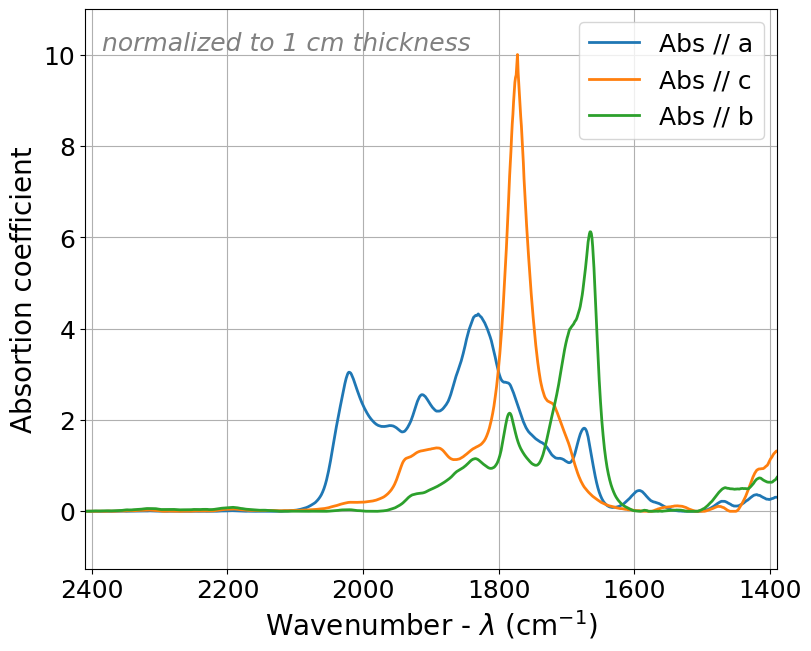

In [3]:
fig, ax = plt.subplots(figsize=(8, 8*0.8), constrained_layout=True)

ax.plot(Si_region['lambda'], Si_region['Aa'], linewidth=2, label=r'Abs // a')
ax.plot(Si_region['lambda'], Si_region['Ac'], linewidth=2, label=r'Abs // c')
ax.plot(Si_region['lambda'], Si_region['Ab'], linewidth=2, label=r'Abs // b')
ax.set_xlabel('Wavenumber - $\lambda$ (cm$^{-1}$)', fontsize=20)
ax.set_ylabel('Absortion coefficient', fontsize=20)

# invert x axis
plt.gca().invert_xaxis()

# set custom x- and y-axis limits
ax.set_xlim(left=2410, right=1390)
ax.set_ylim(top=11)
ax.grid(True)

# annotate
ax.text(x=2385, y=10.1, s='normalized to 1 cm thickness', fontsize=18, color='gray', fontstyle='italic')

ax.legend(loc='best', fontsize=18)
ax.tick_params(axis='both', labelsize=18)

In [4]:
# range to test
Tvals = Si_region.loc[890:940:2, :]  # .loc[rows, columns]
Tvals 

,lambda,Aa,Ab,Ac,Ta,Tb,Tc
890,1958.36,1.87720,0.050078,0.469662,0.013268,0.891091,0.339108
892,1960.29,1.87992,0.041369,0.434536,0.013185,0.909140,0.367675
894,1962.21,1.87345,0.032751,0.402928,0.013383,0.927361,0.395432
896,1964.14,1.86779,0.023121,0.374858,0.013558,0.948153,0.421834
898,1966.07,1.86300,0.017558,0.351033,0.013709,0.960377,0.445622
900,1968.00,1.85813,0.013110,0.328107,0.013863,0.970263,0.469778
902,1969.93,1.85936,0.010106,0.310350,0.013824,0.976999,0.489384
904,1971.86,1.85819,0.008749,0.296606,0.013861,0.980055,0.505119
906,1973.79,1.86387,0.005752,0.283196,0.013681,0.986842,0.520960
908,1975.71,1.87196,0.002437,0.272179,0.013429,0.994404,0.534344


---

In [5]:
#f.explore_Euler_space(step=44, lower_bounds=(0, 0, 0), upper_bounds=(89, 89, 179))

In [6]:
# generate Euler angles each 7 degrees and store in the database
database = SimpleNamespace(euler=f.explore_Euler_space(step=18, lower_bounds=(0, 0, 0), upper_bounds=(89, 89, 179)))
database.euler.shape

(250, 3)

In [7]:
# Initialize dataframe
dataset = pd.DataFrame(
    {
        'Euler1': database.euler[:, 0],
        'Euler2': database.euler[:, 1],
        'Euler3': database.euler[:, 2],
    }
)
#dataset

## Estimate

In [8]:
for index, row in Tvals.iterrows():
    print(row['lambda'])

1958.36
1960.29
1962.21
1964.14
1966.07
1968.0
1969.93
1971.86
1973.79
1975.71
1977.64
1979.57
1981.5
1983.43
1985.36
1987.29
1989.21
1991.14
1993.07
1995.0
1996.93
1998.86
2000.78
2002.71
2004.64
2006.57


In [9]:
for index, row in Tvals.iterrows():
    
    # GENERATE THE DATABASE
    database = SimpleNamespace(euler=f.explore_Euler_space(step=18, lower_bounds=(0, 0, 0), upper_bounds=(89, 89, 179)))
    
    # Generate a mesh of values defining the reference transmissión envelope
    polar, azimuths = f.regular_S2_grid(n_squared=500)
    T = f.Tvalues(trans=(row['Ta'], row['Tb'], row['Tc']), azimuth=azimuths, polar=polar)
    x, y, z = f.sph2cart(T, azimuths, polar)

    # Generate 16 measures at different azimuth angles
    angles = np.arange(0, 360, 45/2)

    # initialize variables
    T_vals = []
    azi_vals = []

    for euler in database.euler:
        # rotate
        x2, y2, z2 = f.rotate(coordinates=(x, y, z), euler_ang=euler)

        # extract XY intersection
        xy_vectors = f.extract_XY_section_fast2(x2, y2, z2)

        # get the indexes of specific angles
        indexes = f.find_nearest(xy_vectors['angles'], angles)

        # append values
        T_vals.append(xy_vectors.loc[indexes, ['T']].T.values.tolist()[0])
        azi_vals.append(xy_vectors.loc[indexes, ['angles']].T.values.tolist()[0])

    # store values in database
    database.T_values = np.array(T_vals)
    database.azimuths = np.array(azi_vals)


    # ESTIMATE ORIENTATIONS
    estimates = np.empty(database.euler.shape[0])

    for index, orientation in enumerate(database.euler):
        measures = np.column_stack((database.T_values[index],
                                    database.azimuths[index],
                                    np.full_like(database.azimuths[index], 90)))

        estimate = f.find_orientation(measurements=measures, params=(row['Ta'], row['Tb'], row['Tc']), num_guesses=20)
        estimates[index] = f.calc_disorientation(orientation, estimate.x)


    # UPDATE DATASET
    dataset[str(row['lambda'])] = estimates

    

## Save

In [10]:
from datetime import date    
today = date.today().isoformat()

In [11]:
dataset.to_csv('test' + today + '_lambda_refined_search.csv', index=False)

In [12]:
dataset.loc[:, ~dataset.columns.isin(['Euler1', 'Euler2', 'Euler3'])].describe()

,1958.36,1960.29,1962.21,1964.14,1966.07,1968.0,1969.93,1971.86,1973.79,1975.71,...,1989.21,1991.14,1993.07,1995.0,1996.93,1998.86,2000.78,2002.71,2004.64,2006.57
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.033696,0.038352,0.037076,0.043468,0.036660,0.037464,0.036460,0.037524,0.033712,0.037248,...,0.029956,0.058684,0.038424,0.041276,0.037668,0.032280,0.031448,0.032344,0.033704,0.025900
std,0.086006,0.085224,0.080938,0.128592,0.084257,0.080876,0.079034,0.079148,0.073504,0.081040,...,0.071679,0.354727,0.083978,0.090346,0.083067,0.076201,0.074603,0.074331,0.077734,0.068193
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001000,0.002000,0.001000,0.002000,0.001000,0.001000,0.002000,0.002000,0.001000,0.002000,...,0.001000,0.002000,0.001000,0.002000,0.001250,0.001250,0.001000,0.002000,0.001000,0.001000
50%,0.003000,0.004000,0.003000,0.004000,0.003500,0.004000,0.003000,0.003500,0.004000,0.004000,...,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.004000,0.003000
75%,0.007000,0.008000,0.008000,0.009000,0.009750,0.009000,0.008750,0.010000,0.009000,0.009750,...,0.009000,0.009000,0.010000,0.010000,0.010750,0.010000,0.010000,0.009750,0.010000,0.009000
max,0.599000,0.362000,0.345000,1.563000,0.513000,0.343000,0.343000,0.361000,0.330000,0.334000,...,0.350000,5.488000,0.365000,0.416000,0.372000,0.390000,0.372000,0.325000,0.350000,0.422000
